In [1]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data_1985 = pd.read_csv('../B(GT) peaks processing/recognition/Ga/plots/1985/0_12.csv', sep='\t', dtype=np.float, decimal=',')

In [3]:
data_1985.to_csv('../B(GT) peaks processing/recognition/Ga/plots/1985/0_12_new.csv', index=False)

In [4]:
data_2015_0_5 = pd.read_csv('../B(GT) peaks processing/recognition/Ga/plots/2015/0_5.csv', sep='\t', dtype=np.float, decimal=',')
data_2015_5_28 = pd.read_csv('../B(GT) peaks processing/recognition/Ga/plots/2015/5_28.csv', sep='\t', dtype=np.float, decimal=',')

In [5]:
data_2015 = data_2015_0_5.append(data_2015_5_28)
#data_2015.to_csv('../plots/2015/0_28.csv', index=False)

In [6]:
data_2015.head()

,x,y
0,-0.076034,4.284644
1,-0.074708,4.284644
2,-0.073382,4.284644
3,-0.072057,4.284644
4,-0.070731,4.284644


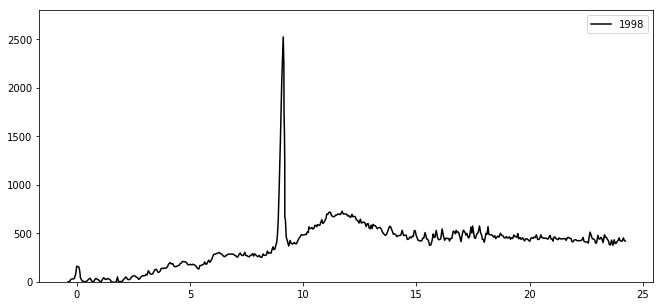

In [26]:
data_1998 = pd.read_csv('../B(GT) peaks processing/recognition/Ga/plots/1998/data.csv', sep='\t', dtype=np.float, decimal=',')
data_1998['x'] = -data_1998['x'] + 450 - 0.25

plt.figure(figsize=(11,5))
plt.plot(data_1998['x'].values, data_1998['y'].values, c='black', label='1998')
plt.ylim(0,2800)
#plt.xlim(-1,5)
plt.legend()
plt.show()

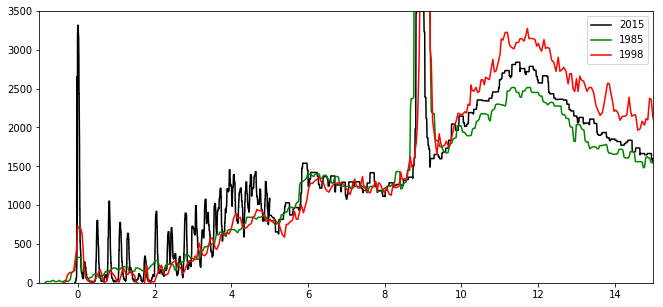

In [32]:
plt.figure(figsize=(11,5))
plt.plot(data_2015['x'].values, data_2015['y'].values, c='black', label='2015')
plt.plot(data_1985['X'].values, data_1985['Y'].values*1.9, c='g', label='1985')
plt.plot(data_1998['x'].values, data_1998['y'].values*4.5, c='red', label='1998')

plt.legend()
plt.xlim(-1,15)
plt.ylim(0,3500)
plt.show()